In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

from helper import AR_generator, manual_ar_process, adf_test, yule_walker, calculate_unit_roots \
    , plot_roots


# Download data

In [2]:
data: pd.DataFrame =  yf.download("^N225", period='5y')
data.dropna(inplace=True)
data.drop(columns=['Adj Close', 'Volume'], inplace=True)
data = data.iloc[:1000]

[*********************100%***********************]  1 of 1 completed


In [43]:
# convert dataframe to latex code
data.head().to_latex("tex_tables/nikkei_head.tex")

In [4]:
close_price = data['Close']
train_data, test_data = train_test_split(close_price, test_size=0.01, shuffle=False)

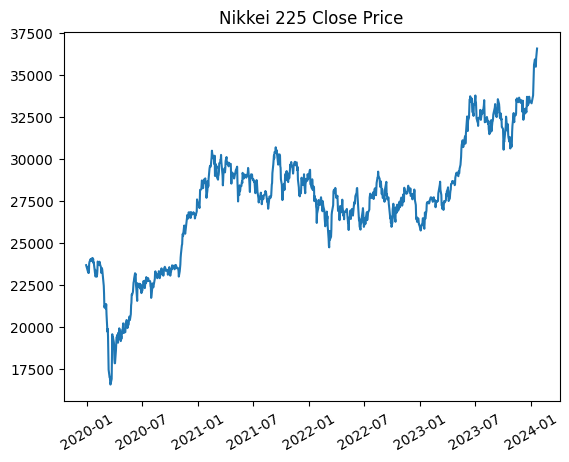

In [5]:
plt.title("Nikkei 225 Close Price")
plt.plot(train_data)
plt.xticks(rotation=30)
plt.savefig("images/plots_application/nikkei_close.png")

## Stationarity

we see that the series is not stationary, check with adf because cannot calculate the unit roots as the parameters are not known

In [6]:
dickey = adf_test(train_data)

Results of Dickey-Fuller Test:
Test Statistic                  -0.690621
p-value                          0.849164
#Lags Used                       3.000000
Number of Observations Used    986.000000
Critical Value (1%)             -3.436999
Critical Value (5%)             -2.864476
Critical Value (10%)            -2.568333
dtype: float64


In [7]:
dickey.to_latex("tex_tables/dickey_full.tex")

In [8]:
train_data_diff = train_data.diff().dropna()
diff_dickey = adf_test(train_data_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.803467e+01
p-value                        2.669475e-30
#Lags Used                     2.000000e+00
Number of Observations Used    9.860000e+02
Critical Value (1%)           -3.436999e+00
Critical Value (5%)           -2.864476e+00
Critical Value (10%)          -2.568333e+00
dtype: float64


In [9]:
diff_dickey.to_latex("tex_tables/diff_dickey_full.tex")

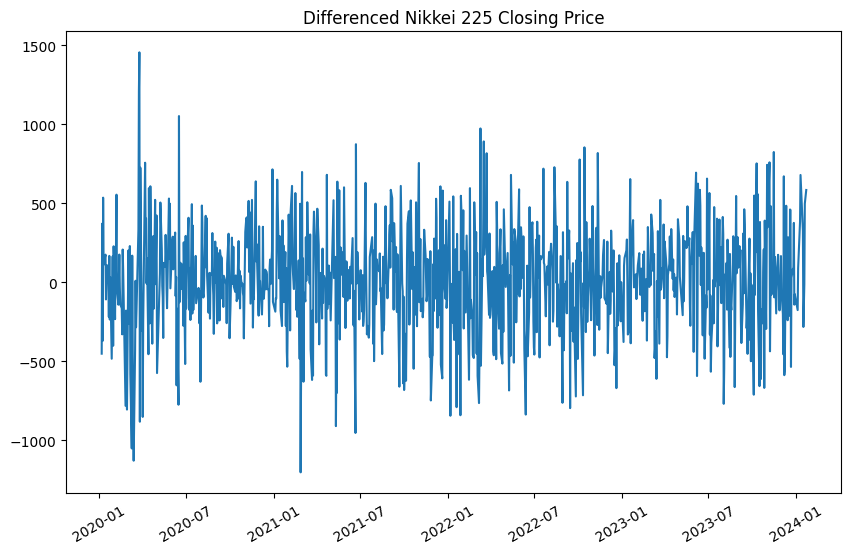

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(train_data_diff)
plt.title("Differenced Nikkei 225 Closing Price")
plt.xticks(rotation=30)
plt.savefig("images/plots_application/nikkei_data_diff.png")
plt.show()

## Plot ACF and PACF

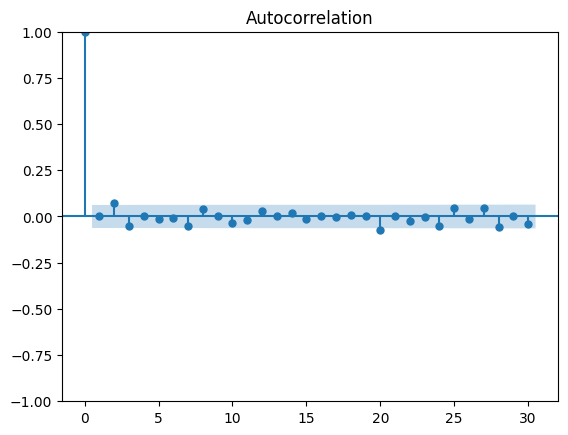

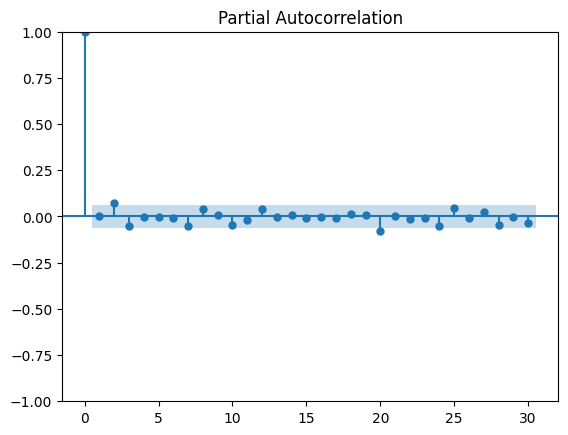

In [11]:
fig1 = plot_acf(train_data_diff, lags=30)
#plt.title("ACF")
plt.show()
fig1.savefig("images/plots_application/nikkei_diff_acf.png")

fig = plot_pacf(train_data_diff, lags=30)
#plt.title("PACF")
#plt.xticks(np.arange(0, 31, 2))
#plt.ylim(-0.1, 1)
plt.show()
fig.savefig("images/plots_application/nikkei_diff_pacf.png")


no insight through these plots, fit models and check values, AIC for example

## Train models

In [12]:
ar_aic_values = np.array([])
for k in range(1, 20):
    model_k = ARIMA(train_data_diff, order=(k, 0, 0)).fit()
    ar_aic_values = np.append(ar_aic_values, model_k.aic)



/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

In [13]:
ma_aic_values = np.array([])
for k in range(1, 20):
    model_k = ARIMA(train_data_diff, order=(0, 0, k)).fit()
    ma_aic_values = np.append(ma_aic_values, model_k.aic)

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

In [14]:
arma_aic_values = np.array([])
for k in range(1, 8):
    for j in range(1, 8):
        model_k = ARIMA(train_data_diff, order=(k, 0, j)).fit()
        arma_aic_values = np.append(arma_aic_values, [model_k.aic, k, j])

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

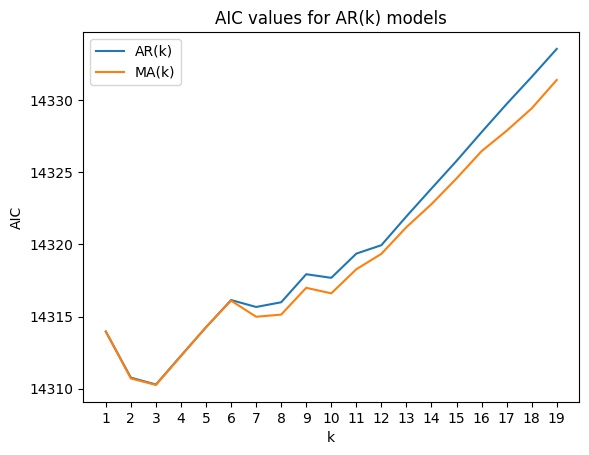

In [27]:
plt.plot(np.arange(1, 20), ar_aic_values, label="AR(k)")
plt.plot(np.arange(1, 20), ma_aic_values, label="MA(k)")
plt.xticks(np.arange(1, 20))
plt.title("AIC values for AR(k) models")
plt.xlabel("k")
plt.ylabel("AIC")
plt.legend()
plt.savefig("images/plots_application/nikkei_values_aic.png")

In [26]:
arma_aic_values = arma_aic_values.reshape(-1, 3)
arma_aic_values = pd.DataFrame(arma_aic_values, columns=["AIC", "AR", "MA"])


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [17]:
arma_aic_values.min()

AIC    14307.513016
AR         1.000000
MA         1.000000
dtype: float64

## Check residuals

In [28]:
model = ARIMA(train_data_diff, order=(3, 0, 3)).fit()

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

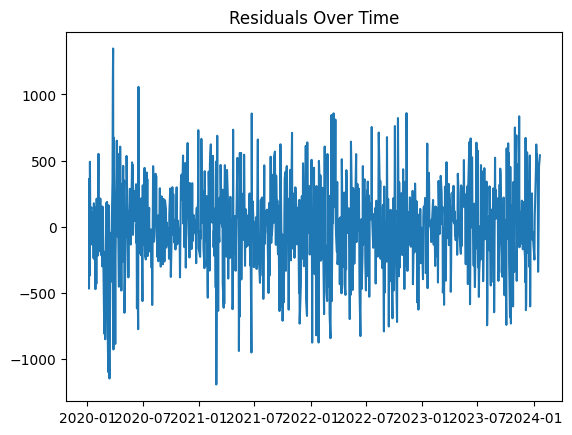

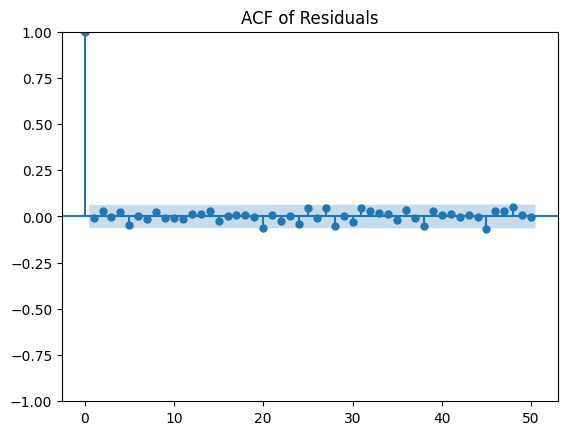

In [29]:
residuals = model.resid
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.show()

plot_acf(residuals, lags=50)
plt.title("ACF of Residuals")
plt.show()

## Compare paramters

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  989
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7147.304
Date:                Sat, 04 Jan 2025   AIC                          14310.608
Time:                        13:46:59   BIC                          14349.781
Sample:                             0   HQIC                         14325.505
                                - 989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0309      8.765      1.487      0.137      -4.147      30.209
ar.L1          0.4654      0.085      5.505      0.000       0.300       0.631
ar.L2         -0.3146      0.097     -3.232      0.001      -0.505      -0.124
ar.L3          0.7911      0.088      9.013      0.000       0.619       0.963
ma.L1         -0.4506      0.073     -6.134      0.000      -0.595      -0.307
ma.L2          0.3580      0.079      4.511      0.000       0.202       0.513
ma.L3         -0.8629      0.076    -11.309      0.000      -1.012      -0.713
sigma2      1.118e+05   4459.138     25.077      0.000    1.03e+05    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                19.27
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.09
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


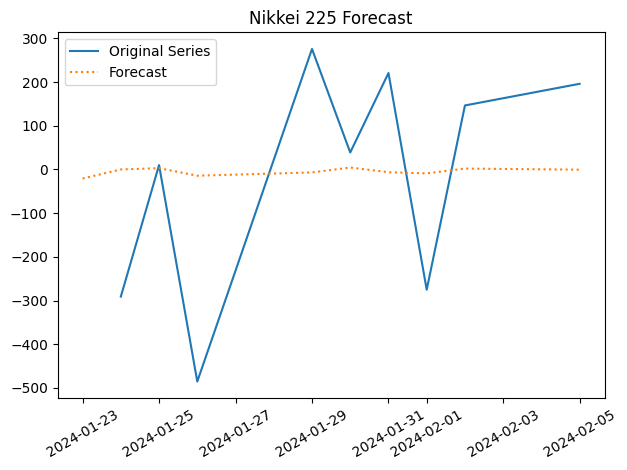

In [36]:
forecast = model.get_forecast(steps=10)
forecast_values = forecast.predicted_mean
forecast_values.index = test_data.index

# Plot
plt.plot(test_data.diff(), label="Original Series")
plt.plot(forecast_values, label="Forecast", linestyle="dotted")
plt.legend()
plt.title("Nikkei 225 Forecast")
plt.xticks(rotation=30)
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.savefig("images/plots_application/nikkei_forecast.png")
plt.show()

## Forecast with the estimated parameters from Yule Walker

In [37]:
estimators, est_var = yule_walker(train_data_diff, 3)

In [38]:
print(estimators, est_var)

[ 0.00499826  0.07243089 -0.05003274] 111464.22875308534


In [24]:
yulewlaker_test = train_data_diff[988:]
estimated_noise = np.random.normal(0, np.sqrt(est_var), 10)
new_predicted = np.zeros(10)
new_predicted[:2] = yulewlaker_test[:2]

for k in range(2,10):
    new_predicted[k] = sum(estimators[i] * new_predicted[k-i-1] for i in range(2)) + estimated_noise[k]

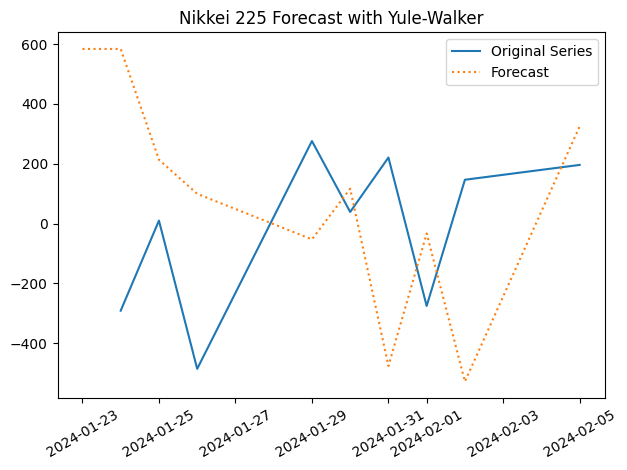

In [39]:
new_predicted = pd.Series(new_predicted)
new_predicted.index = test_data.index
plt.plot(test_data.diff(), label="Original Series")
plt.plot(new_predicted, label="Forecast", linestyle="dotted")
plt.legend()
plt.title("Nikkei 225 Forecast with Yule-Walker")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("images/plots_application/yule_walker_nikkei_forecast.png")
plt.show()